### Задание. 

1.	Открыть онтологию пиццы (https://protege.stanford.edu/ontologies/pizza/pizza.owl) в редакторе онтологий Protégé. Ознакомиться с основными классами, свойствами. 

2.	Запустить машину вывода (HermiT или Pellet, является плагином к Protégé), сравнить классификацию индивидов до и после включения машины вывода. Привести пример выведенных классов, объяснить, почему так произошло (на основе каких аксиом). 

3.	Загрузить онтологию с помощью библиотеки Owlready2. Отобразить классификацию нескольких индивидов с включенной и выключенной машиной вывода. 

4.	Используя редактор Protégé, модифицировать онтологию, введя в нее противоречивый класс (у которого не может быть представителя). Проверить, идентифицируется ли этот класс как противоречивый библиотекой Owlready2. 

### Решение.

1.	Открываем онтологию  из задания в Protégé. 

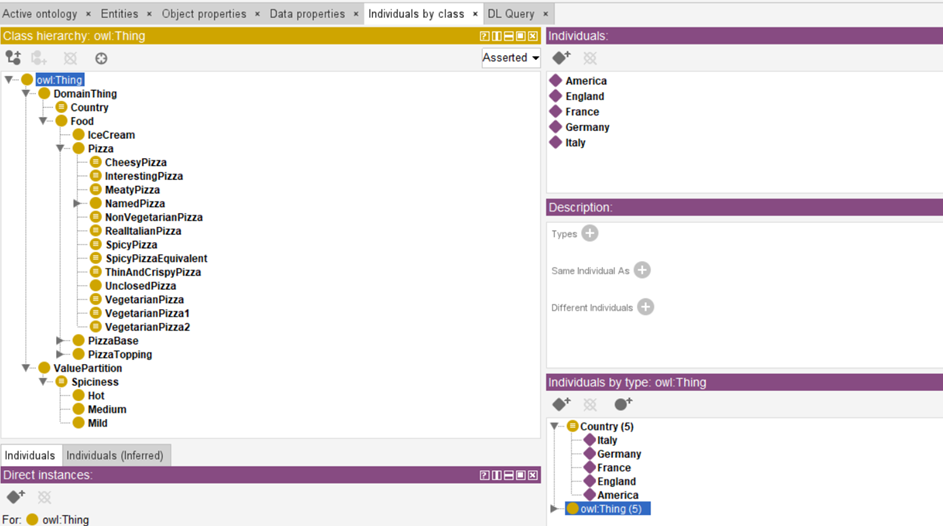

В работе у нас представлена иерархия классов. 
Основные классы – DomainThing, ValuePartition
Подклассы – Country, Food, Spiciness и т.д. 

2.	Запускаем машину вывода HermiT.
Иерархия классов до запуска машины: 

 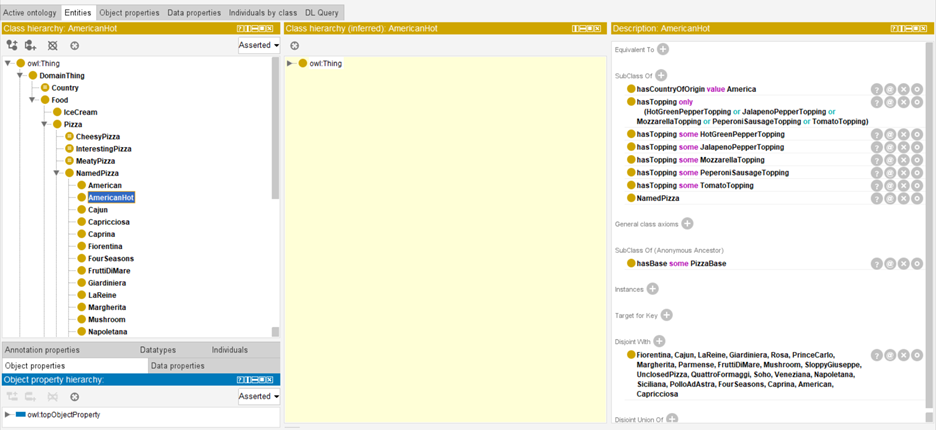

 Иерархия классов после запуска: 
 
 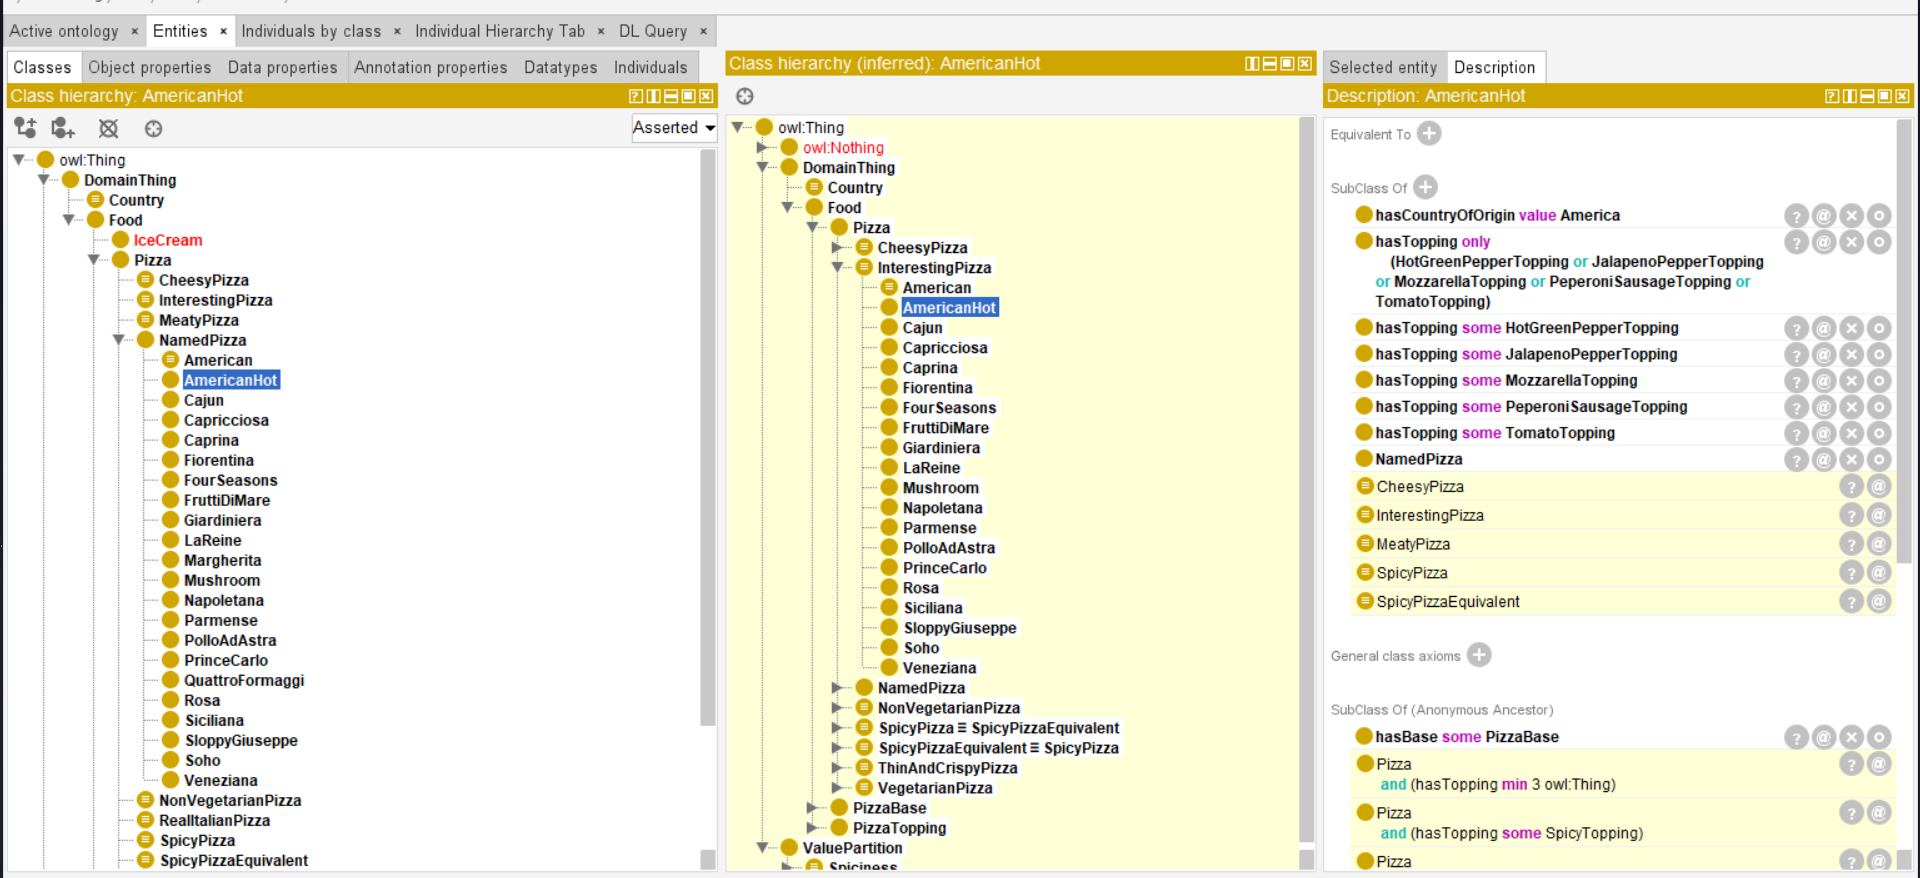

 Как мы видим наша пицца AmericanHot была определена сразу к нескольким классам: CheesyPizza, InterestingPizza, MeatyPizza, SpicyPizza, SpicyPizzaEquivalent 
Рассмотрим причину появления класса MeatyPizzy:

 AmericanHot является подклассом NamedPizza, экземпляр которого является подклассом Pizza. Его экземпляры связаны с один свойством hasTopping (hasTopping some PeperoniSausageTopping). hasTopping также является подклассом класса Pizza


 Все это является определением MeatyPizza: Pizza and (hasTopping some MeatyTopping)
 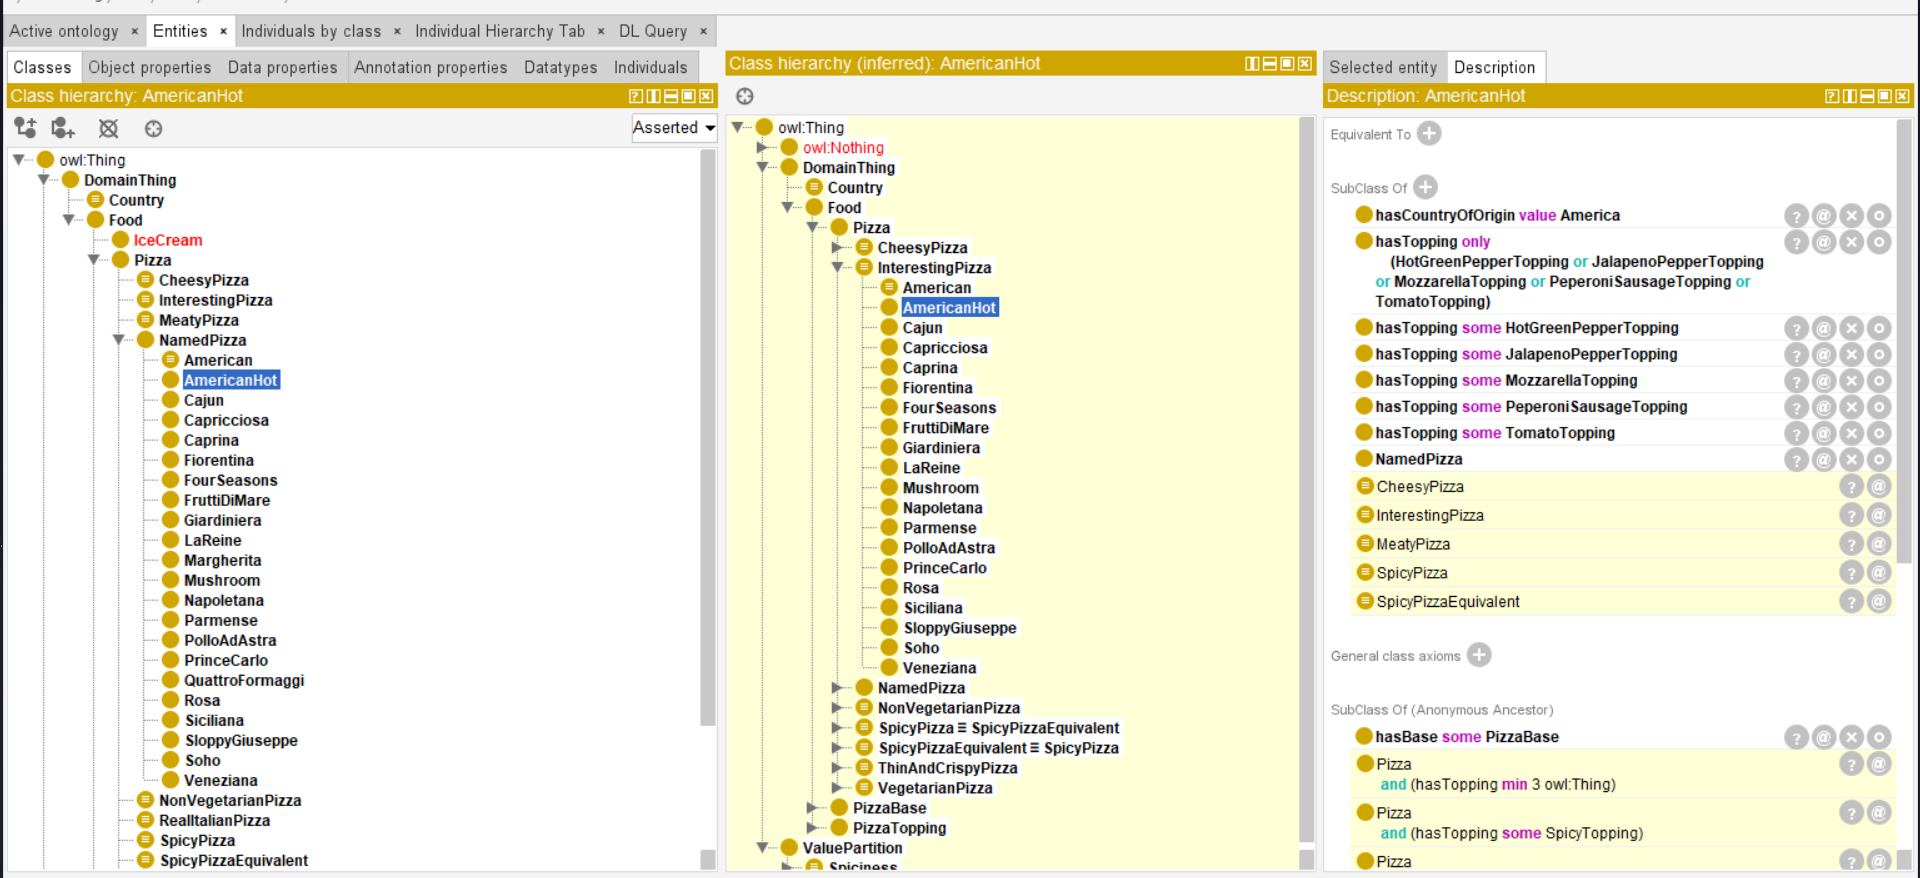

3. Загружаем онотологию с помощью библиотеки Owlready2

In [47]:
from textwrap import fill
import owlready2

Загружаем онтологию

In [48]:
onto = owlready2.get_ontology("C:/Users/User/Desktop/задания/AI_methods .owx").load()

In [49]:
print('Classes:', list(onto.classes()))

Classes: [AI_methods .owx.name, pizza.American, pizza.AmericanHot, pizza.AnchoviesTopping, pizza.ArtichokeTopping, pizza.AsparagusTopping, pizza.Cajun, pizza.CajunSpiceTopping, pizza.CaperTopping, pizza.Capricciosa, pizza.Caprina, pizza.CheeseTopping, pizza.CheeseyPizza, pizza.CheeseyVegetableTopping, pizza.ChickenTopping, pizza.Country, pizza.DeepPanBase, pizza.DomainConcept, pizza.Fiorentina, pizza.FishTopping, pizza.Food, pizza.FourCheesesTopping, pizza.FourSeasons, pizza.FruitTopping, pizza.FruttiDiMare, pizza.GarlicTopping, pizza.Giardiniera, pizza.GoatsCheeseTopping, pizza.GorgonzolaTopping, pizza.GreenPepperTopping, pizza.HamTopping, pizza.HerbSpiceTopping, pizza.Hot, pizza.HotGreenPepperTopping, pizza.HotSpicedBeefTopping, pizza.IceCream, pizza.InterestingPizza, pizza.JalapenoPepperTopping, pizza.LaReine, pizza.LeekTopping, pizza.Margherita, pizza.MeatTopping, pizza.MeatyPizza, pizza.Medium, pizza.Mild, pizza.MixedSeafoodTopping, pizza.MozzarellaTopping, pizza.Mushroom, pizza.M

In [50]:
print('Individuals:', list(onto.individuals()))

Individuals: [pizza.America, pizza.England, pizza.France, pizza.Germany, pizza.Italy]


### Классификация индивидов

In [51]:
AmericanHot = onto.search_one(iri = "*AmericanHot")
Cajun = onto.search_one(iri = "*Cajun")

Теперь посмотрим к каким классам относятся эти индивиды

In [52]:
AmericanHot.is_a

[pizza.NamedPizza,
 pizza.hasTopping.some(pizza.HotGreenPepperTopping),
 pizza.hasTopping.some(pizza.JalapenoPepperTopping),
 pizza.hasTopping.some(pizza.MozzarellaTopping),
 pizza.hasTopping.some(pizza.PeperoniSausageTopping),
 pizza.hasTopping.some(pizza.TomatoTopping),
 pizza.hasTopping.only(pizza.HotGreenPepperTopping | pizza.JalapenoPepperTopping | pizza.MozzarellaTopping | pizza.PeperoniSausageTopping | pizza.TomatoTopping),
 pizza.hasCountryOfOrigin.value(pizza.America),
 pizza.SpicyPizza,
 pizza.InterestingPizza,
 pizza.MeatyPizza,
 pizza.CheeseyPizza]

In [53]:
Cajun.is_a

[pizza.NamedPizza,
 pizza.hasTopping.some(pizza.MozzarellaTopping),
 pizza.hasTopping.some(pizza.OnionTopping),
 pizza.hasTopping.some(pizza.PeperonataTopping),
 pizza.hasTopping.some(pizza.PrawnsTopping),
 pizza.hasTopping.some(pizza.TobascoPepperSauce),
 pizza.hasTopping.some(pizza.TomatoTopping),
 pizza.hasTopping.only(pizza.MozzarellaTopping | pizza.OnionTopping | pizza.PeperonataTopping | pizza.PrawnsTopping | pizza.TobascoPepperSauce | pizza.TomatoTopping),
 pizza.SpicyPizza,
 pizza.NonVegetarianPizza,
 pizza.InterestingPizza,
 pizza.CheeseyPizza]

Воспользуемся машиной вывода

In [54]:
from owlready2 import *
import owlready2
owlready2.JAVA_EXE = "C:\Program Files (x86)\Common Files\Oracle\Java\javapath\java.exe"

In [55]:
owlready2.sync_reasoner_hermit()

* Owlready2 * Running HermiT...
    C:\Program Files (x86)\Common Files\Oracle\Java\javapath\java.exe -Xmx2000M -cp c:\Python310\lib\site-packages\owlready2\hermit;c:\Python310\lib\site-packages\owlready2\hermit\HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:///C:/Users/User/AppData/Local/Temp/tmp82rbjow9
* Owlready2 * HermiT took 2.8977999687194824 seconds
* Owlready * Equivalenting: р.owx.CheesyNoCheesyPizza owl.Nothing
* Owlready * Equivalenting: pizza.CheeseyVegetableTopping owl.Nothing
* Owlready * Equivalenting: pizza.IceCream owl.Nothing
* Owlready * Equivalenting: pizza.SpicyPizza pizza.SpicyPizzaEquivalent
* Owlready * Equivalenting: pizza.SpicyPizzaEquivalent pizza.SpicyPizza
* Owlready * Equivalenting: pizza.VegetarianPizzaEquivalent1 pizza.VegetarianPizzaEquivalent2
* Owlready * Equivalenting: pizza.VegetarianPizzaEquivalent2 pizza.VegetarianPizzaEquivalent1
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but

In [56]:
AmericanHot.is_a

[pizza.NamedPizza,
 pizza.hasTopping.some(pizza.HotGreenPepperTopping),
 pizza.hasTopping.some(pizza.JalapenoPepperTopping),
 pizza.hasTopping.some(pizza.MozzarellaTopping),
 pizza.hasTopping.some(pizza.PeperoniSausageTopping),
 pizza.hasTopping.some(pizza.TomatoTopping),
 pizza.hasTopping.only(pizza.HotGreenPepperTopping | pizza.JalapenoPepperTopping | pizza.MozzarellaTopping | pizza.PeperoniSausageTopping | pizza.TomatoTopping),
 pizza.hasCountryOfOrigin.value(pizza.America),
 pizza.SpicyPizza,
 pizza.InterestingPizza,
 pizza.MeatyPizza,
 pizza.CheeseyPizza]

In [57]:
Cajun.is_a

[pizza.NamedPizza,
 pizza.hasTopping.some(pizza.MozzarellaTopping),
 pizza.hasTopping.some(pizza.OnionTopping),
 pizza.hasTopping.some(pizza.PeperonataTopping),
 pizza.hasTopping.some(pizza.PrawnsTopping),
 pizza.hasTopping.some(pizza.TobascoPepperSauce),
 pizza.hasTopping.some(pizza.TomatoTopping),
 pizza.hasTopping.only(pizza.MozzarellaTopping | pizza.OnionTopping | pizza.PeperonataTopping | pizza.PrawnsTopping | pizza.TobascoPepperSauce | pizza.TomatoTopping),
 pizza.SpicyPizza,
 pizza.NonVegetarianPizza,
 pizza.InterestingPizza,
 pizza.CheeseyPizza]

Для нашей AmericanHotPizza библиотека owlready2 вывела MeatyPizza, как и Protégé

### 4. Добавляем противоречивый класс

Через редактор Protégé добавляем противоречивый класс и запускаем HermiT, чтобы посмотреть к чему он отнесет его. 

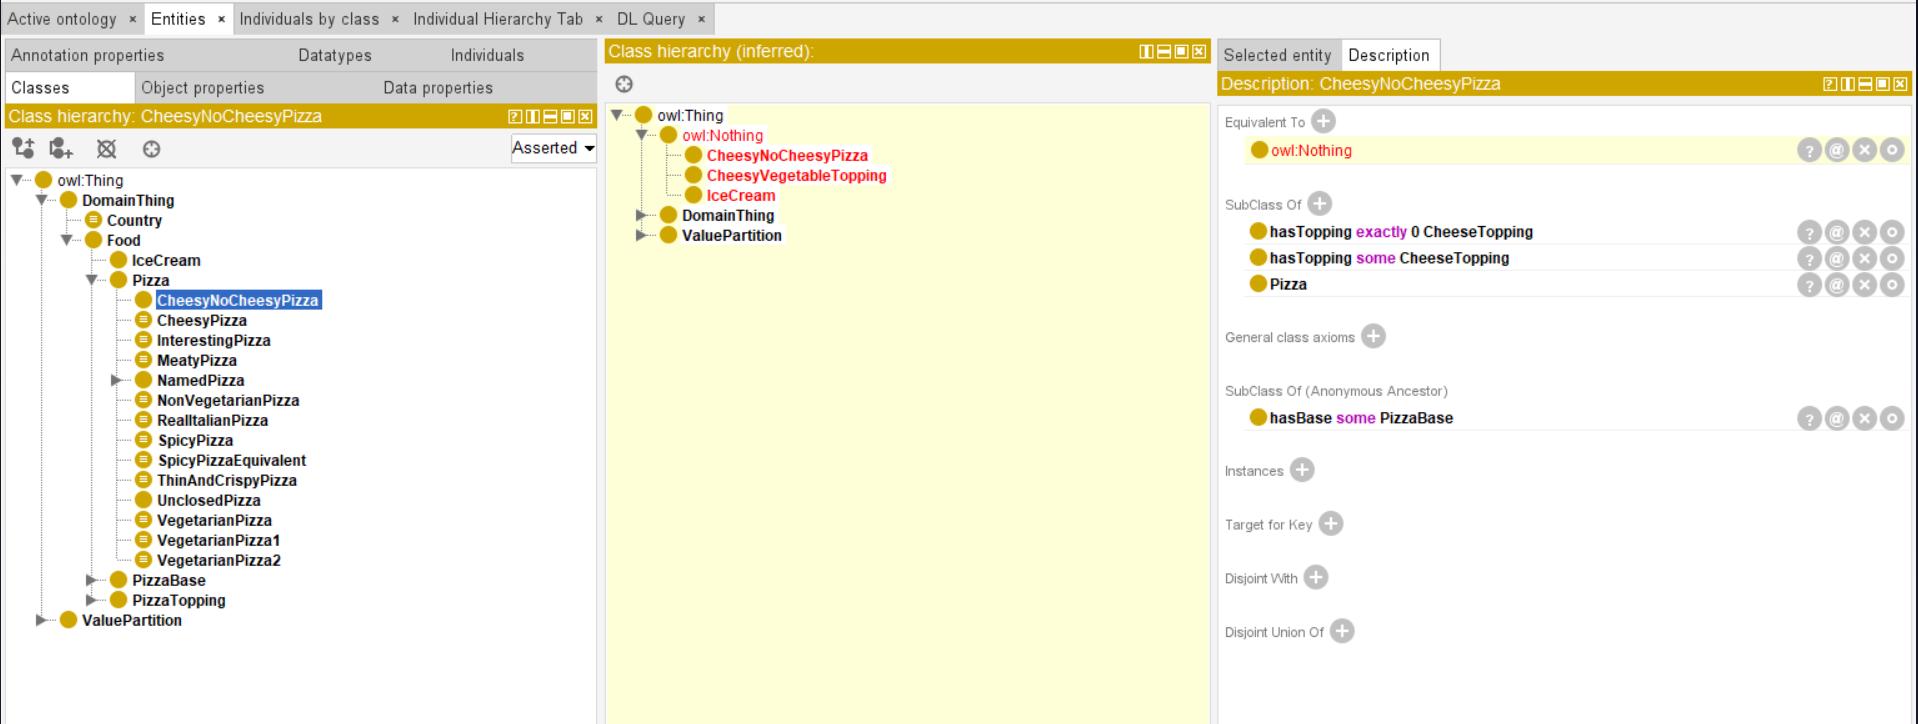

Как мы видим нам противоречивый класс CheesyNoCheesyPizza онтология отнеса к `owl:Nothing`.
Теперь проверим через библиотеку owlready2

In [58]:
onto_new = owlready2.get_ontology("C:/Users/User/Desktop/р.owx").load()

In [59]:
print('Classes:', list(onto_new.classes()))

Classes: [pizza.American, pizza.AmericanHot, pizza.AnchoviesTopping, pizza.ArtichokeTopping, pizza.AsparagusTopping, pizza.Cajun, pizza.CajunSpiceTopping, pizza.CaperTopping, pizza.Capricciosa, pizza.Caprina, pizza.CheeseTopping, pizza.CheeseyPizza, pizza.CheeseyVegetableTopping, pizza.ChickenTopping, pizza.Country, pizza.DeepPanBase, pizza.DomainConcept, pizza.Fiorentina, pizza.FishTopping, pizza.Food, pizza.FourCheesesTopping, pizza.FourSeasons, pizza.FruitTopping, pizza.FruttiDiMare, pizza.GarlicTopping, pizza.Giardiniera, pizza.GoatsCheeseTopping, pizza.GorgonzolaTopping, pizza.GreenPepperTopping, pizza.HamTopping, pizza.HerbSpiceTopping, pizza.Hot, pizza.HotGreenPepperTopping, pizza.HotSpicedBeefTopping, pizza.IceCream, pizza.InterestingPizza, pizza.JalapenoPepperTopping, pizza.LaReine, pizza.LeekTopping, pizza.Margherita, pizza.MeatTopping, pizza.MeatyPizza, pizza.Medium, pizza.Mild, pizza.MixedSeafoodTopping, pizza.MozzarellaTopping, pizza.Mushroom, pizza.MushroomTopping, pizza.

In [60]:
NoCheesy   = onto_new.search_one(iri = "*CheesyNoCheesyPizza")

In [61]:
NoCheesy.is_a

[pizza.Pizza,
 pizza.hasTopping.some(pizza.CheeseTopping),
 pizza.hasTopping.exactly(0, pizza.CheeseTopping)]

In [62]:
owlready2.sync_reasoner_hermit()

* Owlready2 * Running HermiT...
    C:\Program Files (x86)\Common Files\Oracle\Java\javapath\java.exe -Xmx2000M -cp c:\Python310\lib\site-packages\owlready2\hermit;c:\Python310\lib\site-packages\owlready2\hermit\HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:///C:/Users/User/AppData/Local/Temp/tmp7jhqutgj
* Owlready2 * HermiT took 2.8496627807617188 seconds
* Owlready * Equivalenting: р.owx.CheesyNoCheesyPizza owl.Nothing
* Owlready * Equivalenting: pizza.CheeseyVegetableTopping owl.Nothing
* Owlready * Equivalenting: pizza.IceCream owl.Nothing
* Owlready * Equivalenting: pizza.SpicyPizza pizza.SpicyPizzaEquivalent
* Owlready * Equivalenting: pizza.SpicyPizzaEquivalent pizza.SpicyPizza
* Owlready * Equivalenting: pizza.VegetarianPizzaEquivalent1 pizza.VegetarianPizzaEquivalent2
* Owlready * Equivalenting: pizza.VegetarianPizzaEquivalent2 pizza.VegetarianPizzaEquivalent1
* Owlready * (NB: only changes on entities loaded in Python are shown, other changes are done but

In [63]:
NoCheesy.is_a

[pizza.Pizza,
 pizza.hasTopping.some(pizza.CheeseTopping),
 pizza.hasTopping.exactly(0, pizza.CheeseTopping)]

In [64]:
NoCheesy.equivalent_to

[owl.Nothing]

Как мы видим онтология через библиотеку owlready2 также заметила противоречие, потому что пицца без сыра не может иметь хотя бы один сырный топинг